In [1]:
!pip uninstall en-core-web-sm==3.7.1
!pip uninstall albumentations==1.4.14
!pip install pip==23.3
!pip install https://huggingface.co/kenisgod/en_ingredient_extract/resolve/main/en_ingredient_extract-any-py3-none-any.whl


Found existing installation: en-core-web-sm 3.7.1
Uninstalling en-core-web-sm-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/en_core_web_sm-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/en_core_web_sm/*
Proceed (Y/n)? Y
  Successfully uninstalled en-core-web-sm-3.7.1
Found existing installation: albumentations 1.4.20
Uninstalling albumentations-1.4.20:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/albumentations-1.4.20.dist-info/*
    /usr/local/lib/python3.10/dist-packages/albumentations/*
Proceed (Y/n)? Y
  Successfully uninstalled albumentations-1.4.20
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

In [3]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")
nlp = spacy.load("en_ingredient_extract")

train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


# Preprocessing

In [4]:
train.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [5]:
test.describe()

,id
count,9944.000000
mean,24894.350362
std,14322.958061
min,5.000000
25%,12541.000000
50%,24731.500000
75%,37113.250000
max,49715.000000


In [6]:
train.isna().describe()

,id,cuisine,ingredients
count,39774,39774,39774
unique,1,1,1
top,False,False,False
freq,39774,39774,39774


In [7]:
test.isna().describe()

,id,ingredients
count,9944,9944
unique,1,1
top,False,False
freq,9944,9944


In [8]:
train.isna().sum()

,0
id,0
cuisine,0
ingredients,0


In [9]:
test.isna().sum()

,0
id,0
ingredients,0


In [28]:
def NER(ingredients_list):
  ingredients=[]
  for phrase in ingredients_list:

    ent = nlp(phrase).ents

    for j in ent:
      ingredients.append(j.text)
  return ingredients

print(NER(train.iloc[1]['ingredients']))
train.iloc[1]['ingredients']



['pepper', 'salt', 'tomatoes', 'black pepper', 'thyme', 'eggs', 'tomatoes', 'corn meal', 'milk', 'vegetable oil']


['plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

Number of Unique Cuisines are:  20


,count
cuisine,
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673
french,2646
cajun_creole,1546
thai,1539
japanese,1423


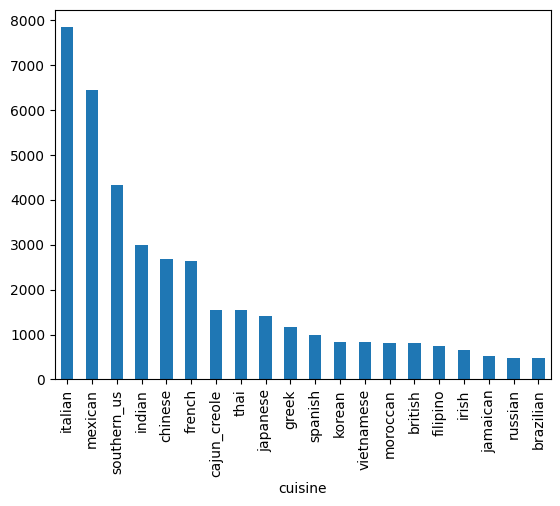

In [10]:
cuisine_freq = train["cuisine"].value_counts()

cuisine_freq.plot(kind="bar")
print("Number of Unique Cuisines are: ",len(cuisine_freq))
cuisine_freq


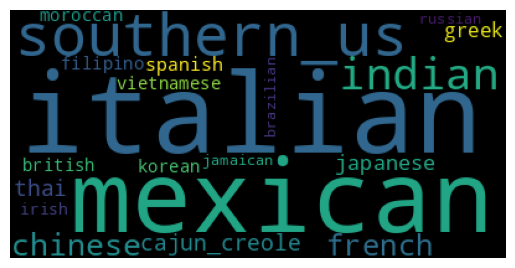

In [11]:
cuisine_freq_dict = cuisine_freq.to_dict()

wordcloud = WordCloud()
cuisine_wordcloud = wordcloud.generate_from_frequencies(cuisine_freq_dict)
plt.axis('off')
plt.imshow(cuisine_wordcloud)

In [12]:
ingredients_df = train.explode('ingredients')
ingredients_freq = ingredients_df['ingredients'].value_counts()


print("Number of Unique Ingredients are: ",len(ingredients_freq))
ingredients_freq

Number of Unique Ingredients are:  6714


,count
ingredients,
salt,18049
olive oil,7972
onions,7972
water,7457
garlic,7380
...,...
sauerkraut juice,1
no-calorie sweetener,1
Bob Evans Italian Sausage,1


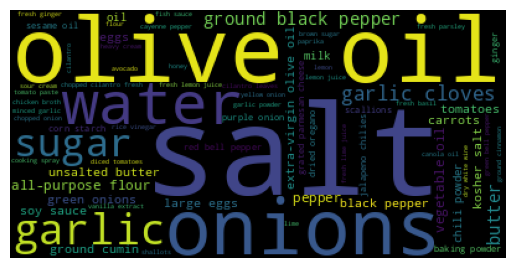

In [13]:
ingredients_freq_dict = ingredients_freq.to_dict()
ingredients_freq_wordcloud=wordcloud.generate_from_frequencies(ingredients_freq_dict)
plt.axis('off')
plt.imshow(ingredients_freq_wordcloud)

In [14]:
ingredients_by_cuisine = ingredients_df.groupby('cuisine')

ingredients_by_cuisine_freq = ingredients_by_cuisine['ingredients'].value_counts()

ingredients_by_cuisine_freq

cuisine     ingredients         
brazilian   salt                    194
            onions                  133
            olive oil               118
            lime                     89
            water                    87
                                   ... 
vietnamese  worcestershire sauce      1
            yam bean                  1
            yellow peppers            1
            yellow squash             1
            yukon gold potatoes       1
Name: count, Length: 29179, dtype: int64

In [15]:

#To do for pre-processing, i think:
#NER: The one from Assignment 1 is missing ingredients: confirm if we need to do NER or no.
#Rank freq all that plots from Assignment 1
#Freq-cuisine stuff from Assignment 2
#Create WordCloud/barplot/any visualisation, to see what ingredients are popular per cuisine - dont know how to use ingredients_by_cuisine_freq for that